In [48]:
import pandas as pd


In [49]:
# Load the updated dataset for EDA on each position
file_path = '/content/Final.csv'
data = pd.read_csv(file_path)

# Inspect unique positions to understand the range and format
positions = data['Pos'].unique()
positions


array(['DF,FW', 'DF', 'MF,FW', 'FW,MF', 'MF', 'DF,MF', 'FW', 'GK',
       'MF,DF', 'FW,DF'], dtype=object)

In [50]:
import pandas as pd

# Assuming `data` is your loaded DataFrame
# Simplify to primary position types (DF, MF, FW, GK)
data['Primary_Pos'] = data['Pos'].str.split(',').str[0]

# Summary of basic statistics for each position type
eda_summary = data.groupby('Primary_Pos').agg(
    Avg_Age=('Age', 'mean'),
    Avg_Market_Value=('market_value_in_eur', 'mean'),
    Total_Goals=('Gls', 'sum'),
    Total_Assists=('Ast', 'sum'),
    Avg_Shots=('Sh', 'mean'),
    Avg_Pass_Accuracy=('Cmp%', 'mean'),
    Total_Def_Actions=('Tkl', 'sum'),  # Tackles as a defensive indicator
    Avg_Clean_Sheets=('Gls', lambda x: (x == 0).mean())  # Clean sheets as games without goals
).reset_index()

# Display the EDA summary
print(eda_summary)


  Primary_Pos    Avg_Age  Avg_Market_Value  Total_Goals  Total_Assists  \
0          DF  25.915905      1.272980e+07        547.0          697.0   
1          FW  25.079320      2.097649e+07       2118.0          925.0   
2          GK  28.479167      1.116042e+07          0.0            6.0   
3          MF  25.018018      1.771622e+07       1009.0          983.0   

   Avg_Shots  Avg_Pass_Accuracy  Total_Def_Actions  Avg_Clean_Sheets  
0  12.658135          81.265265            18908.0          0.438757  
1  41.705382          72.425496             6141.0          0.079320  
2   0.041667          73.822917               65.0          1.000000  
3  25.457207          80.259234            16138.0          0.254505  


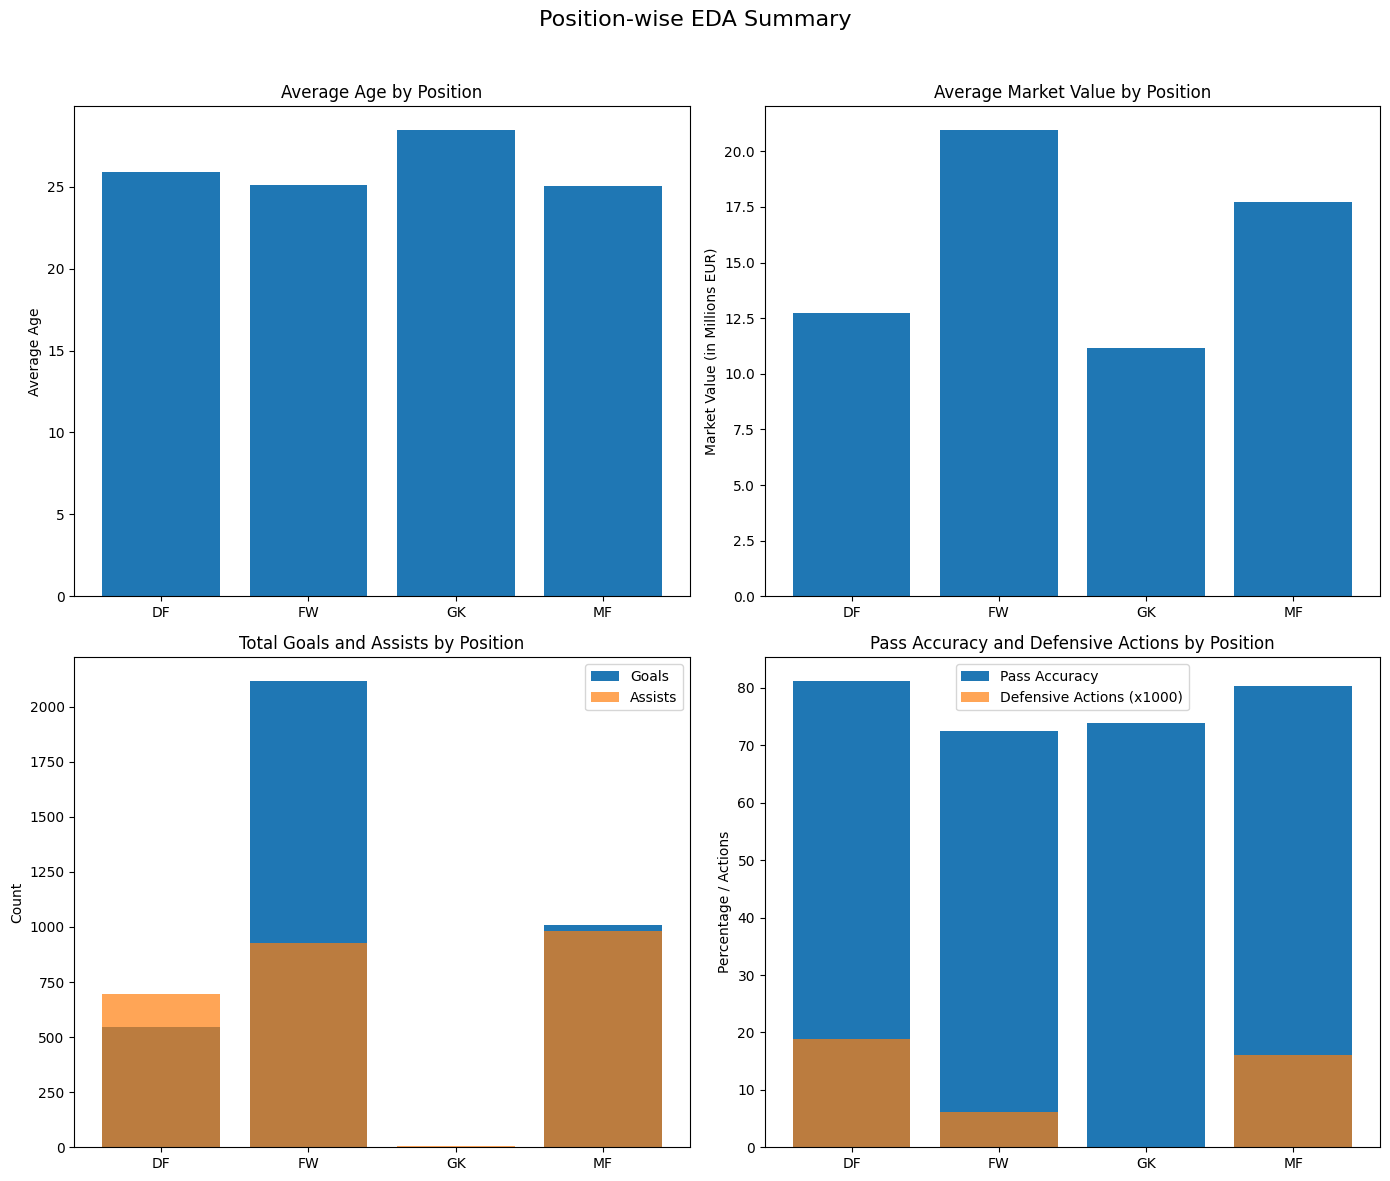

In [51]:
import matplotlib.pyplot as plt

# Set up visualization for EDA by position
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Position-wise EDA Summary", fontsize=16)

# Plot 1: Average Age per Position
axes[0, 0].bar(eda_summary['Primary_Pos'], eda_summary['Avg_Age'])
axes[0, 0].set_title('Average Age by Position')
axes[0, 0].set_ylabel('Average Age')

# Plot 2: Average Market Value per Position
axes[0, 1].bar(eda_summary['Primary_Pos'], eda_summary['Avg_Market_Value'] / 1e6)
axes[0, 1].set_title('Average Market Value by Position')
axes[0, 1].set_ylabel('Market Value (in Millions EUR)')

# Plot 3: Total Goals and Assists by Position
axes[1, 0].bar(eda_summary['Primary_Pos'], eda_summary['Total_Goals'], label='Goals')
axes[1, 0].bar(eda_summary['Primary_Pos'], eda_summary['Total_Assists'], label='Assists', alpha=0.7)
axes[1, 0].set_title('Total Goals and Assists by Position')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend()

# Plot 4: Pass Accuracy and Defensive Actions by Position
axes[1, 1].bar(eda_summary['Primary_Pos'], eda_summary['Avg_Pass_Accuracy'], label='Pass Accuracy')
axes[1, 1].bar(eda_summary['Primary_Pos'], eda_summary['Total_Def_Actions'] / 1000, label='Defensive Actions (x1000)', alpha=0.7)
axes[1, 1].set_title('Pass Accuracy and Defensive Actions by Position')
axes[1, 1].set_ylabel('Percentage / Actions')
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Average Age by Position: Shows the average age for each primary position.
Average Market Value by Position: Illustrates market values, with forwards having the highest average.
Total Goals and Assists by Position: Highlights contributions to goals and assists, with forwards leading in goals and midfielders contributing significantly in assists.
Pass Accuracy and Defensive Actions: Compares pass accuracy and defensive actions, where defenders excel in both accuracy and defensive plays.

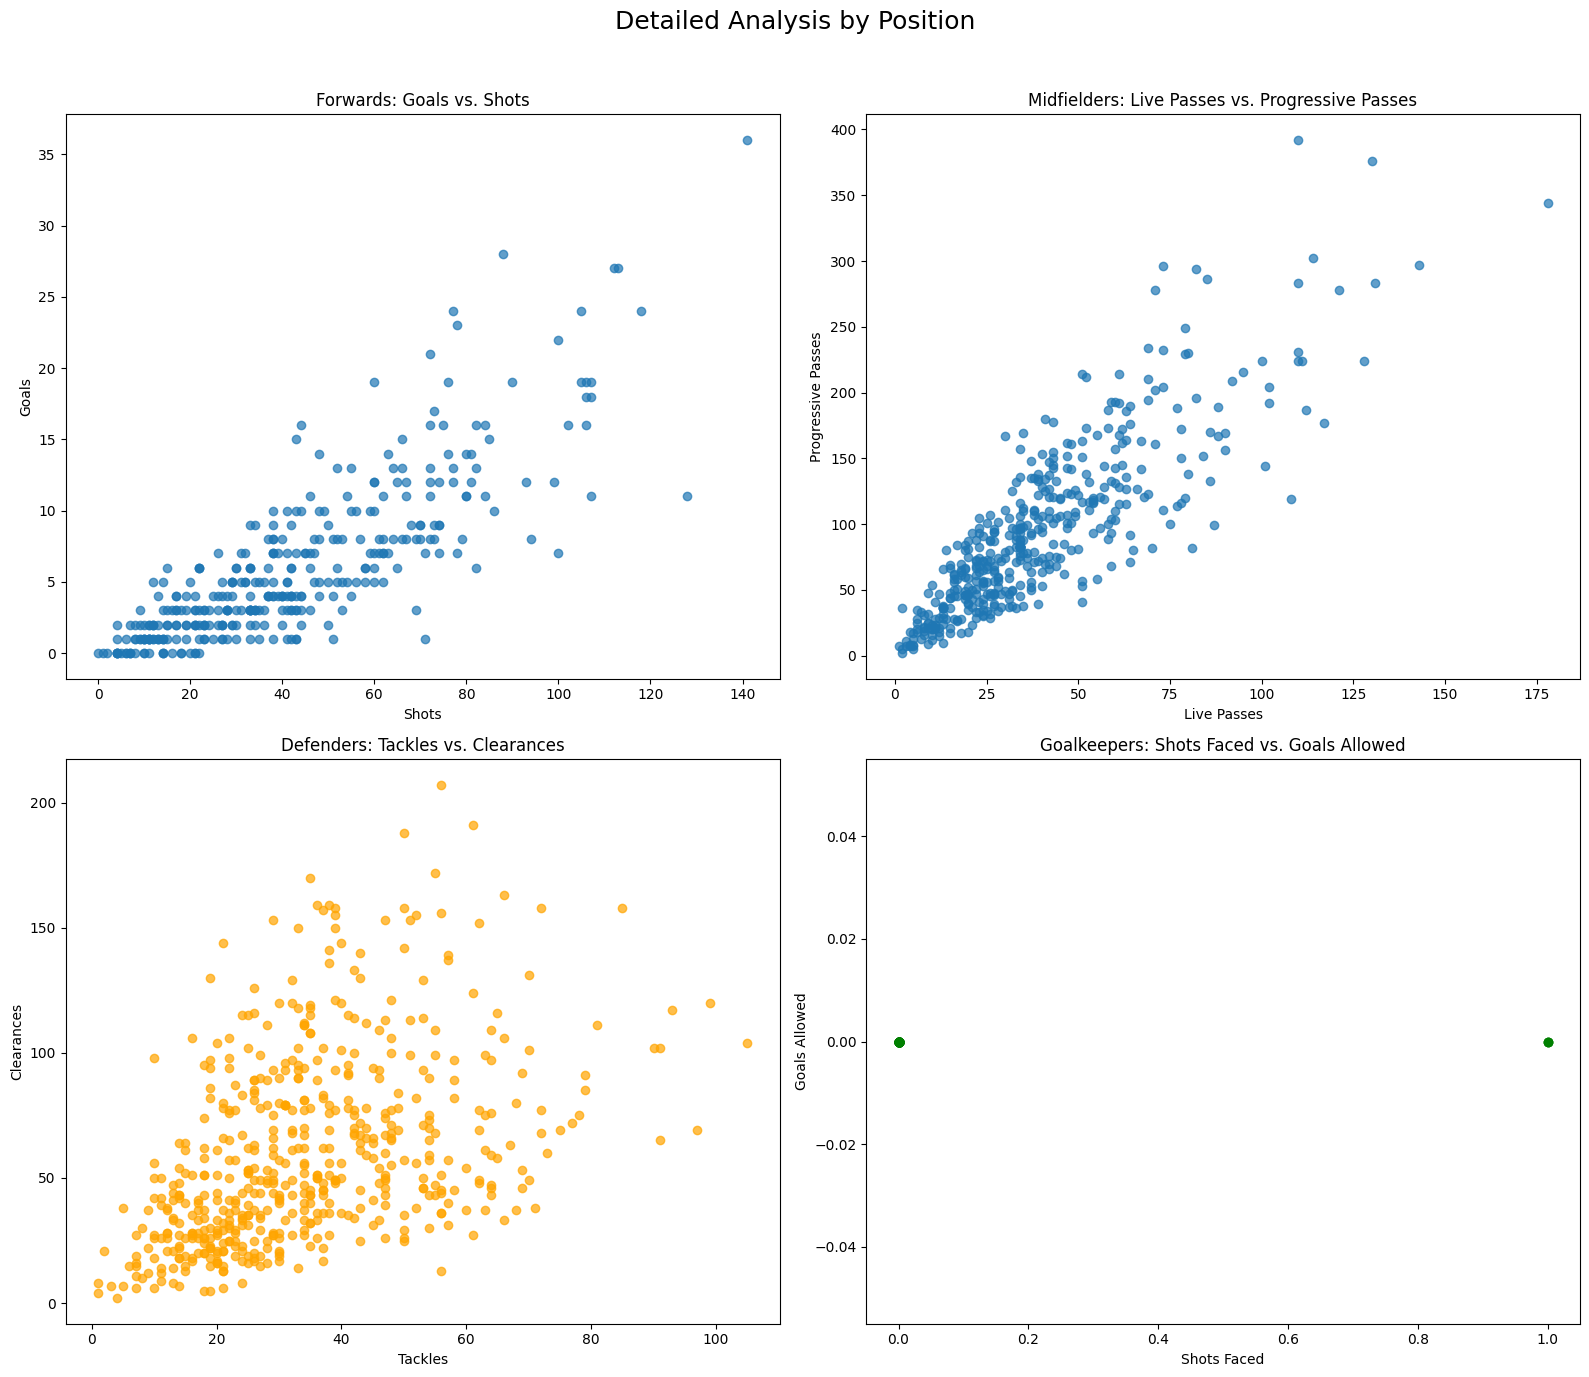

In [52]:
# Separate data by primary position for detailed analysis
forwards = data[data['Primary_Pos'] == 'FW']
midfielders = data[data['Primary_Pos'] == 'MF']
defenders = data[data['Primary_Pos'] == 'DF']
goalkeepers = data[data['Primary_Pos'] == 'GK']

# Set up visualizations for detailed analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle("Detailed Analysis by Position", fontsize=18)

# Forwards: Goals per Shot and xG
axes[0, 0].scatter(forwards['Sh'], forwards['Gls'], alpha=0.7, label="Goals")
axes[0, 0].set_title('Forwards: Goals vs. Shots')
axes[0, 0].set_xlabel('Shots')
axes[0, 0].set_ylabel('Goals')

# Midfielders: Key Passes and Progressive Passes
axes[0, 1].scatter(midfielders['PassLive'], midfielders['PrgP'], alpha=0.7, label="Progressive Passes")
axes[0, 1].set_title('Midfielders: Live Passes vs. Progressive Passes')
axes[0, 1].set_xlabel('Live Passes')
axes[0, 1].set_ylabel('Progressive Passes')

# Defenders: Tackles and Clearances
axes[1, 0].scatter(defenders['Tkl'], defenders['Clr'], alpha=0.7, color="orange", label="Clearances")
axes[1, 0].set_title('Defenders: Tackles vs. Clearances')
axes[1, 0].set_xlabel('Tackles')
axes[1, 0].set_ylabel('Clearances')

# Goalkeepers: Saves and Clean Sheets (using Goals conceded as inverse indicator)
axes[1, 1].scatter(goalkeepers['Sh'], goalkeepers['Gls'], alpha=0.7, color="green", label="Goals Allowed")
axes[1, 1].set_title('Goalkeepers: Shots Faced vs. Goals Allowed')
axes[1, 1].set_xlabel('Shots Faced')
axes[1, 1].set_ylabel('Goals Allowed')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Forwards: The plot shows the relationship between shots taken and goals scored, providing insight into scoring efficiency.
Midfielders: Displays live passes versus progressive passes, highlighting how midfielders contribute to advancing play.
Defenders: Tackles versus clearances offer a view of their effectiveness in disrupting and clearing threats.
Goalkeepers: Illustrates shots faced versus goals conceded, reflecting goalkeepers' resilience under pressure.

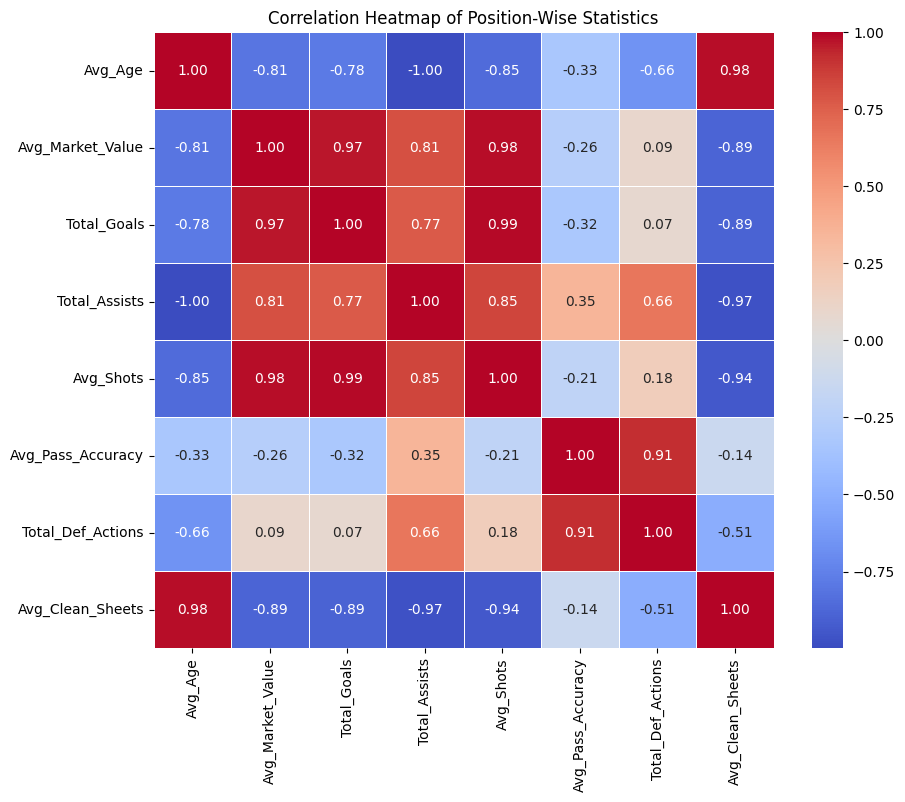

In [53]:
import seaborn as sns

# Select relevant numerical columns for correlation analysis
numerical_data = eda_summary[['Avg_Age', 'Avg_Market_Value', 'Total_Goals',
                              'Total_Assists', 'Avg_Shots', 'Avg_Pass_Accuracy',
                              'Total_Def_Actions', 'Avg_Clean_Sheets']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Position-Wise Statistics")
plt.show()


The heatmap reveals correlations between various player statistics and market value, suggesting that certain metrics impact market valuation differently for each position. Here’s how we can interpret the visualization:

Forwards: Likely metrics impacting market value include Total Goals, Shots, and Assists, as forwards are often valued for their scoring efficiency.
Midfielders: Key metrics might include Pass Accuracy, Progressive Passes, and Assists, since midfielders are evaluated based on their playmaking ability.
Defenders: Defensive Actions (tackles, clearances) and Pass Accuracy tend to be crucial as they define a defender’s effectiveness in protecting the team.
Goalkeepers: Metrics like Clean Sheets and Saves are central since they showcase a goalkeeper’s reliability in goal.

In [54]:
# Calculate correlation of market value with other metrics for each position
position_metrics = {}

# Iterate through each primary position and calculate correlation with market value
for position in eda_summary['Primary_Pos'].unique():
    # Filter the data for the current position
    pos_data = data[data['Primary_Pos'] == position]

    # Calculate correlations of market value with other relevant columns
    correlations = pos_data[['market_value_in_eur', 'Gls', 'Ast', 'Sh', 'Cmp%', 'Tkl']].corr()['market_value_in_eur']
    position_metrics[position] = correlations

# Create a DataFrame to display the correlations for each position
position_metrics_df = pd.DataFrame(position_metrics).drop('market_value_in_eur').transpose()

# Display the DataFrame with correlation results for each position
position_metrics_df


,Gls,Ast,Sh,Cmp%,Tkl
DF,0.317412,0.171590,0.301642,0.372667,0.178674
FW,0.588865,0.490942,0.591488,0.303794,0.204440
GK,NaN,0.011632,-0.077199,0.312962,0.059895
MF,0.499631,0.452522,0.411584,0.279339,0.262540


**Dimension Reduction

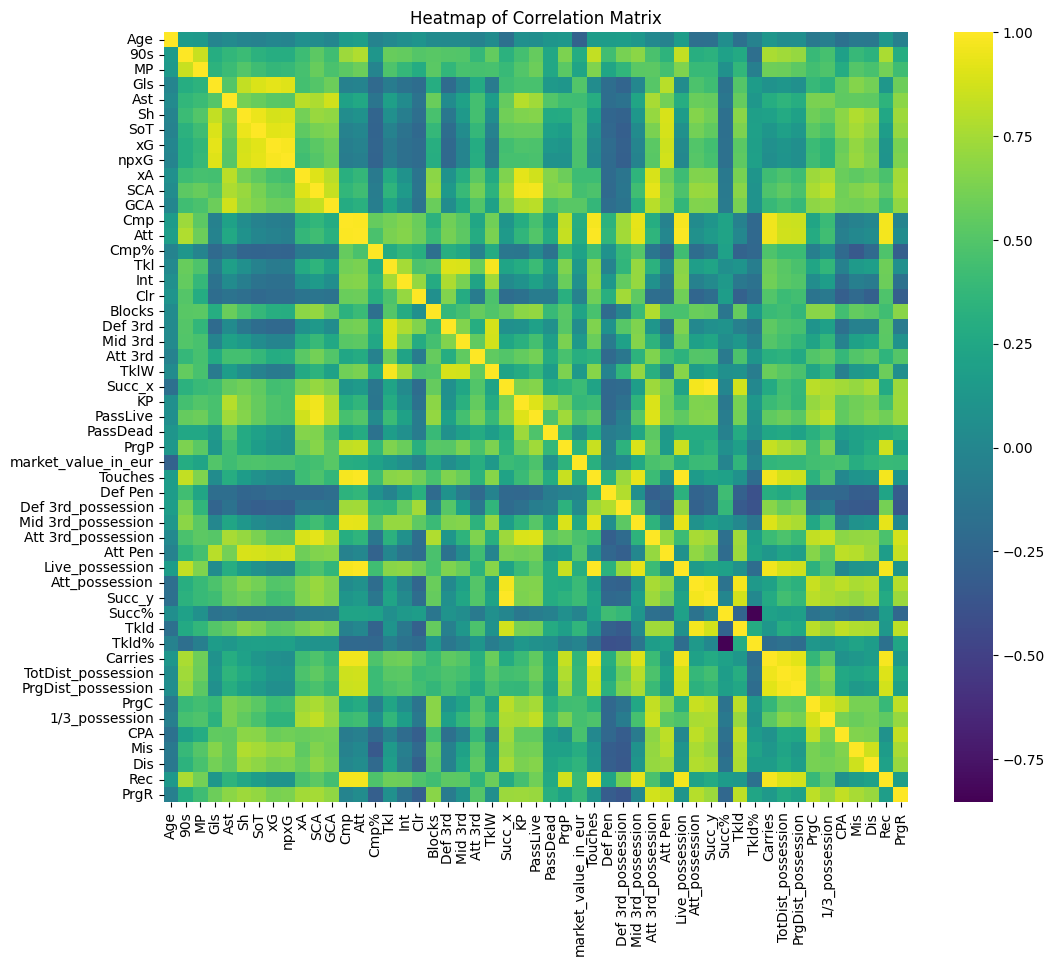

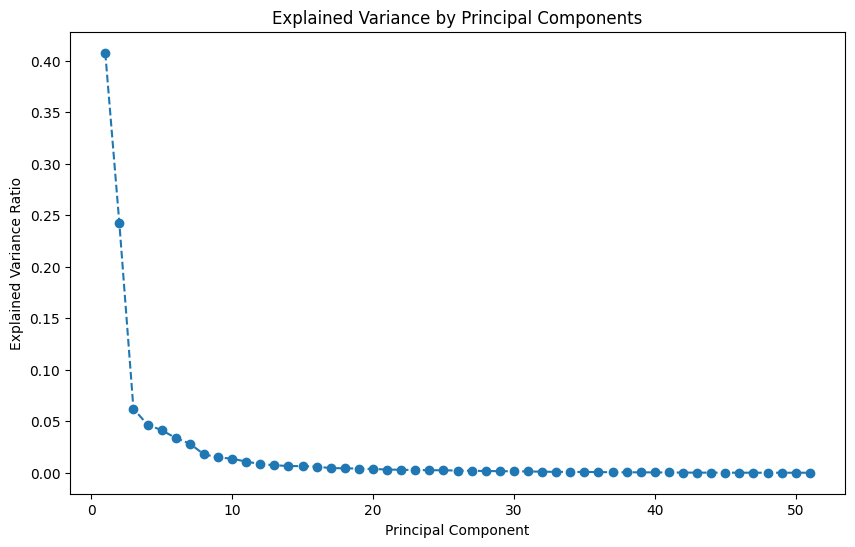

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preprocess the data by dropping non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64']).dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = pd.DataFrame(scaled_data, columns=numeric_data.columns).corr()
sns.heatmap(corr_matrix, cmap="viridis", annot=False)
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Plot the explained variance by each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


**PCA

In [56]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/Final.csv'
data = pd.read_csv(file_path)

# Separate the dataset into positions: attackers, midfielders, defenders
attackers_data = data[data['Pos'].str.contains('FW', na=False)]
midfielders_data = data[data['Pos'].str.contains('MF', na=False)]
defenders_data = data[data['Pos'].str.contains('DF', na=False)]

# Drop non-numeric columns for PCA and standardize the data
def preprocess_for_pca(df):
    numeric_data = df.select_dtypes(include=[float, int]).dropna(axis=1, how='any')
    scaled_data = StandardScaler().fit_transform(numeric_data)
    return scaled_data, numeric_data.columns

# Prepare data for PCA for each position
attackers_scaled, attackers_features = preprocess_for_pca(attackers_data)
midfielders_scaled, midfielders_features = preprocess_for_pca(midfielders_data)
defenders_scaled, defenders_features = preprocess_for_pca(defenders_data)

# Perform PCA, retaining components that explain at least 90% of the variance
def apply_pca(scaled_data, features):
    pca = PCA(n_components=0.9)  # Retain components explaining 90% variance
    pca.fit(scaled_data)
    explained_variance = pca.explained_variance_ratio_.sum()
    num_components = pca.n_components_
    important_features = [features[i] for i in pca.components_.argmax(axis=1)]
    return num_components, explained_variance, important_features

# Apply PCA for attackers, midfielders, and defenders
attackers_pca_result = apply_pca(attackers_scaled, attackers_features)
midfielders_pca_result = apply_pca(midfielders_scaled, midfielders_features)
defenders_pca_result = apply_pca(defenders_scaled, defenders_features)

# Display the results as a DataFrame
pca_results = {
    'Position': ['Attackers', 'Midfielders', 'Defenders'],
    'Number of Components': [attackers_pca_result[0], midfielders_pca_result[0], defenders_pca_result[0]],
    'Explained Variance (%)': [attackers_pca_result[1] * 100, midfielders_pca_result[1] * 100, defenders_pca_result[1] * 100],
    'Important Features': [attackers_pca_result[2], midfielders_pca_result[2], defenders_pca_result[2]]
}

pca_results_df = pd.DataFrame(pca_results)

# Display the DataFrame
print(pca_results_df)


      Position  Number of Components  Explained Variance (%)  \
0    Attackers                     8               90.282699   
1  Midfielders                    10               91.065858   
2    Defenders                    10               90.304479   

                                  Important Features  
0  [Att 3rd_possession, npxG, Clr, PassDead, Cmp%...  
1  [PassLive, Def 3rd_possession, Def 3rd, Tkld%,...  
2  [PassLive, Def Pen, npxG, PassDead, Cmp%, mark...  


In [57]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/Final.csv'
data = pd.read_csv(file_path)

# Separate the dataset into positions: attackers, midfielders, defenders
attackers_data = data[data['Pos'].str.contains('FW', na=False)]
midfielders_data = data[data['Pos'].str.contains('MF', na=False)]
defenders_data = data[data['Pos'].str.contains('DF', na=False)]

# Drop non-numeric columns for PCA and standardize the data
def preprocess_for_pca(df):
    numeric_data = df.select_dtypes(include=[float, int]).dropna(axis=1, how='any')
    scaled_data = StandardScaler().fit_transform(numeric_data)
    return scaled_data, numeric_data.columns

# Prepare data for PCA for each position
attackers_scaled, attackers_features = preprocess_for_pca(attackers_data)
midfielders_scaled, midfielders_features = preprocess_for_pca(midfielders_data)
defenders_scaled, defenders_features = preprocess_for_pca(defenders_data)

# Perform PCA, retaining components that explain at least 90% of the variance
def apply_pca(scaled_data, features):
    pca = PCA(n_components=0.9)  # Retain components explaining 90% variance
    pca.fit(scaled_data)
    explained_variance = pca.explained_variance_ratio_.sum()
    num_components = pca.n_components_
    important_features = [features[i] for i in pca.components_.argmax(axis=1)]
    return num_components, explained_variance, important_features

# Apply PCA for attackers, midfielders, and defenders
attackers_pca_result = apply_pca(attackers_scaled, attackers_features)
midfielders_pca_result = apply_pca(midfielders_scaled, midfielders_features)
defenders_pca_result = apply_pca(defenders_scaled, defenders_features)

# Display the original number of features before PCA for each position
original_num_features = len(attackers_features)

# Display the results showing how many components were reduced from the original number
reduction_results = {
    'Position': ['Attackers', 'Midfielders', 'Defenders'],
    'Original Number of Features': [original_num_features, original_num_features, original_num_features],
    'Reduced Number of Components': [attackers_pca_result[0], midfielders_pca_result[0], defenders_pca_result[0]],
    'Explained Variance (%)': [attackers_pca_result[1] * 100, midfielders_pca_result[1] * 100, defenders_pca_result[1] * 100],
    'Important Features': [attackers_pca_result[2], midfielders_pca_result[2], defenders_pca_result[2]]
}

# Create a DataFrame to show the reduction results
reduction_results_df = pd.DataFrame(reduction_results)

# Display the DataFrame
print(reduction_results_df)


      Position  Original Number of Features  Reduced Number of Components  \
0    Attackers                           49                             8   
1  Midfielders                           49                            10   
2    Defenders                           49                            10   

   Explained Variance (%)                                 Important Features  
0               90.282699  [Att 3rd_possession, npxG, Clr, PassDead, Cmp%...  
1               91.065858  [PassLive, Def 3rd_possession, Def 3rd, Tkld%,...  
2               90.304479  [PassLive, Def Pen, npxG, PassDead, Cmp%, mark...  


In [58]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/Final.csv'  # Update with the correct file path if needed
data = pd.read_csv(file_path)

# Filter data for attackers
attackers_data = data[data['Pos'].str.contains('FW', na=False)].dropna()

# Use all numeric features available for attackers, excluding the target variable itself
all_attackers_features = [col for col in attackers_data.select_dtypes(include=[np.number]).columns if col != 'market_value_in_eur']

# Log-transform the target variable to stabilize variance
attackers_data['log_market_value'] = np.log1p(attackers_data['market_value_in_eur'])  # Using log1p to handle zero values safely

# Train the Gradient Boosting model using the log-transformed target variable
gb_model_log = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_model_log.fit(attackers_data[all_attackers_features], attackers_data['log_market_value'])

# Make predictions and evaluate the model
gb_pred_log = gb_model_log.predict(attackers_data[all_attackers_features])
rmse_log = np.sqrt(mean_squared_error(attackers_data['log_market_value'], gb_pred_log))
r2_log = r2_score(attackers_data['log_market_value'], gb_pred_log)

# Output the evaluation metrics
print(f"RMSE (Log-Transformed)- Attackers: {rmse_log}")
print(f"R² (Log-Transformed)- Attackers: {r2_log}")


RMSE (Log-Transformed)- Attackers: 0.41037994302809916
R² (Log-Transformed)- Attackers: 0.8971080276848366


In [59]:
# Filter data for midfielders and defenders
midfielders_data = data[data['Pos'].str.contains('MF', na=False)].dropna()
defenders_data = data[data['Pos'].str.contains('DF', na=False)].dropna()

# Use all numeric features available, excluding the target variable itself
all_midfielders_features = [col for col in midfielders_data.select_dtypes(include=[np.number]).columns if col != 'market_value_in_eur']
all_defenders_features = [col for col in defenders_data.select_dtypes(include=[np.number]).columns if col != 'market_value_in_eur']

# Log-transform the target variable for midfielders and defenders
midfielders_data['log_market_value'] = np.log1p(midfielders_data['market_value_in_eur'])
defenders_data['log_market_value'] = np.log1p(defenders_data['market_value_in_eur'])

# Train the Gradient Boosting model for midfielders
gb_model_log_mid = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_model_log_mid.fit(midfielders_data[all_midfielders_features], midfielders_data['log_market_value'])

# Make predictions and evaluate the model for midfielders
gb_pred_log_mid = gb_model_log_mid.predict(midfielders_data[all_midfielders_features])
rmse_log_mid = np.sqrt(mean_squared_error(midfielders_data['log_market_value'], gb_pred_log_mid))
r2_log_mid = r2_score(midfielders_data['log_market_value'], gb_pred_log_mid)

# Train the Gradient Boosting model for defenders
gb_model_log_def = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_model_log_def.fit(defenders_data[all_defenders_features], defenders_data['log_market_value'])

# Make predictions and evaluate the model for defenders
gb_pred_log_def = gb_model_log_def.predict(defenders_data[all_defenders_features])
rmse_log_def = np.sqrt(mean_squared_error(defenders_data['log_market_value'], gb_pred_log_def))
r2_log_def = r2_score(defenders_data['log_market_value'], gb_pred_log_def)

# Output the evaluation metrics for midfielders and defenders
(rmse_log_mid, r2_log_mid), (rmse_log_def, r2_log_def)


((0.45415560356665857, 0.860775826081873),
 (0.4411840613788887, 0.8579890917285278))

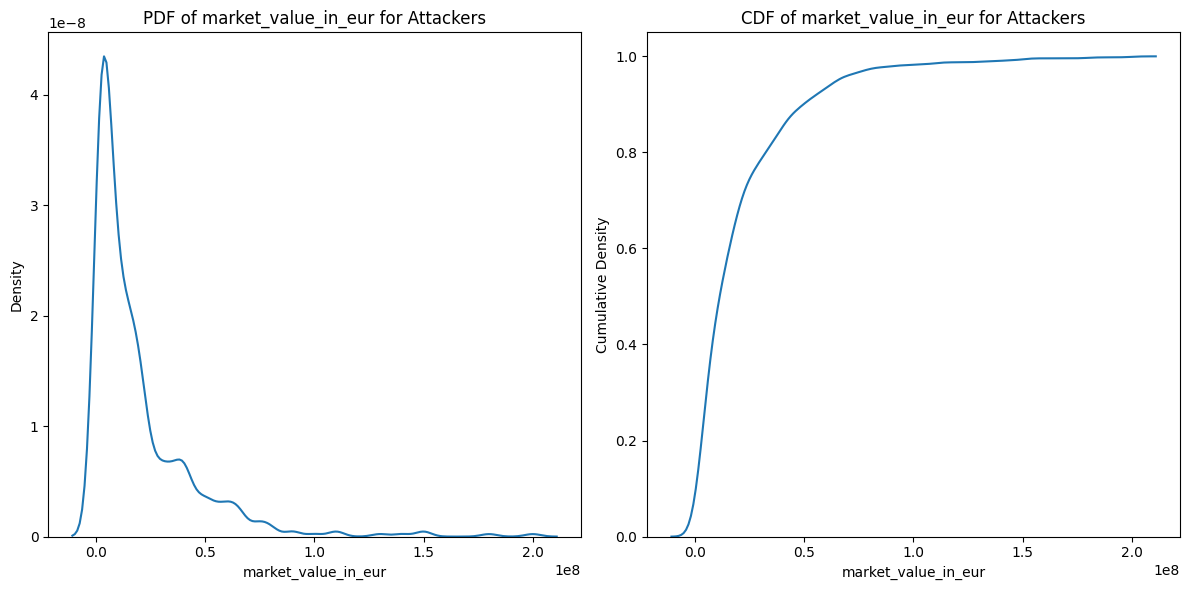

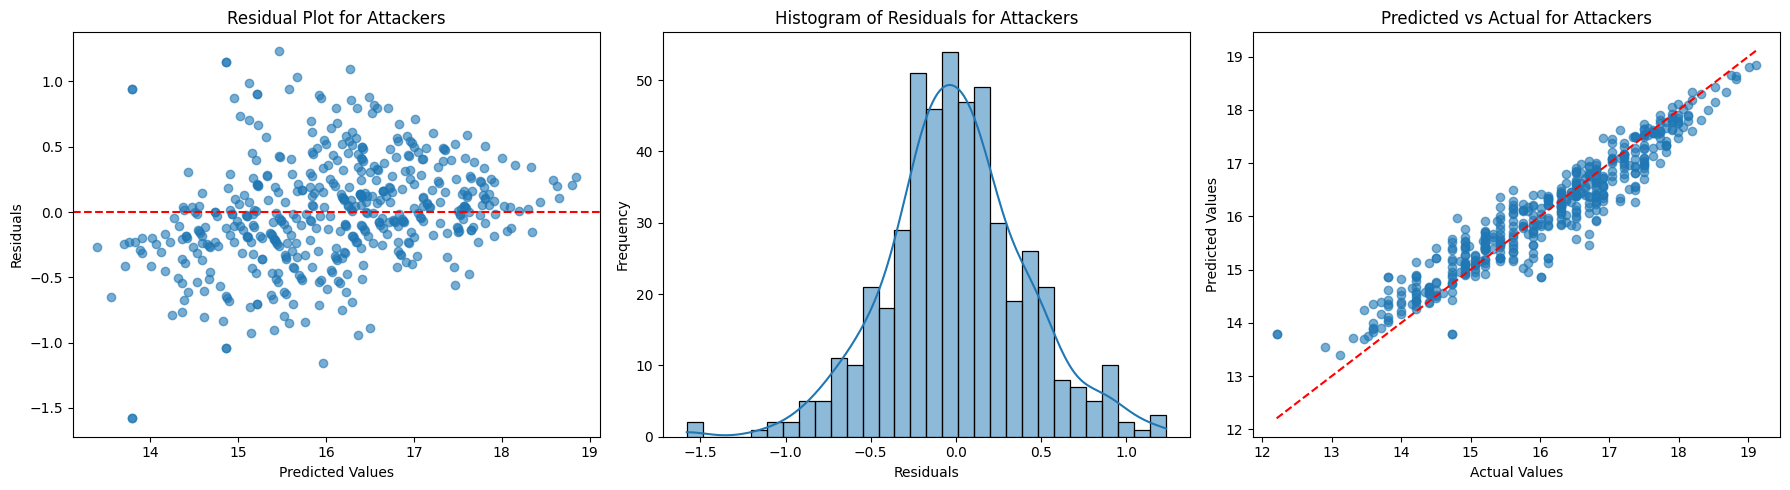

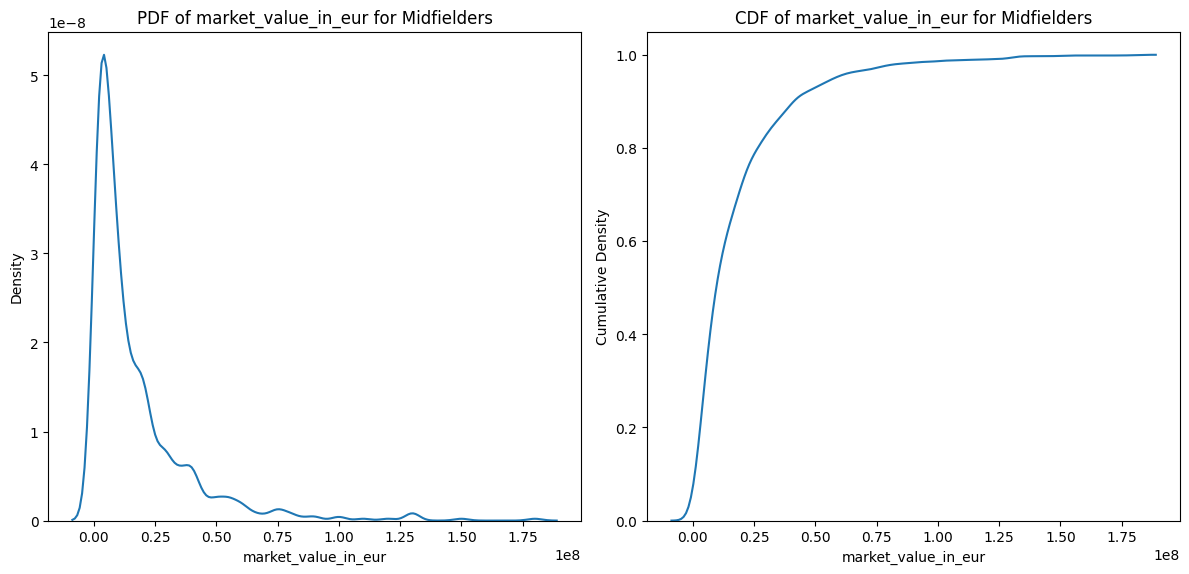

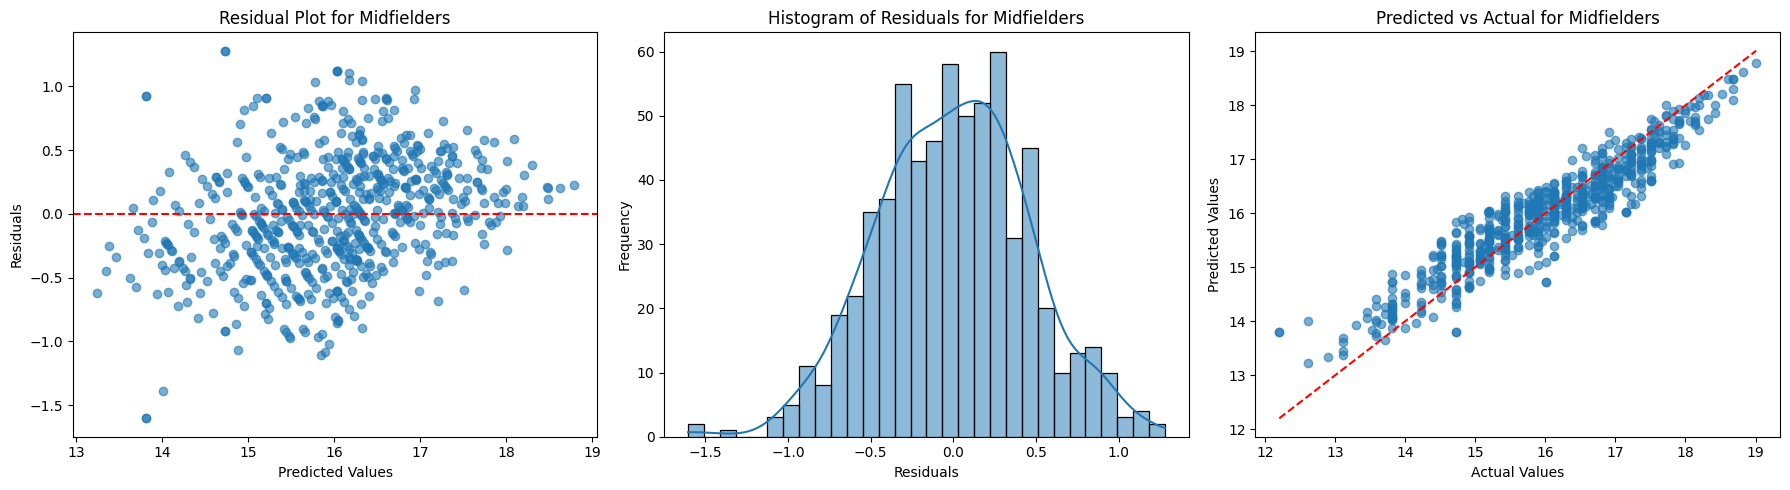

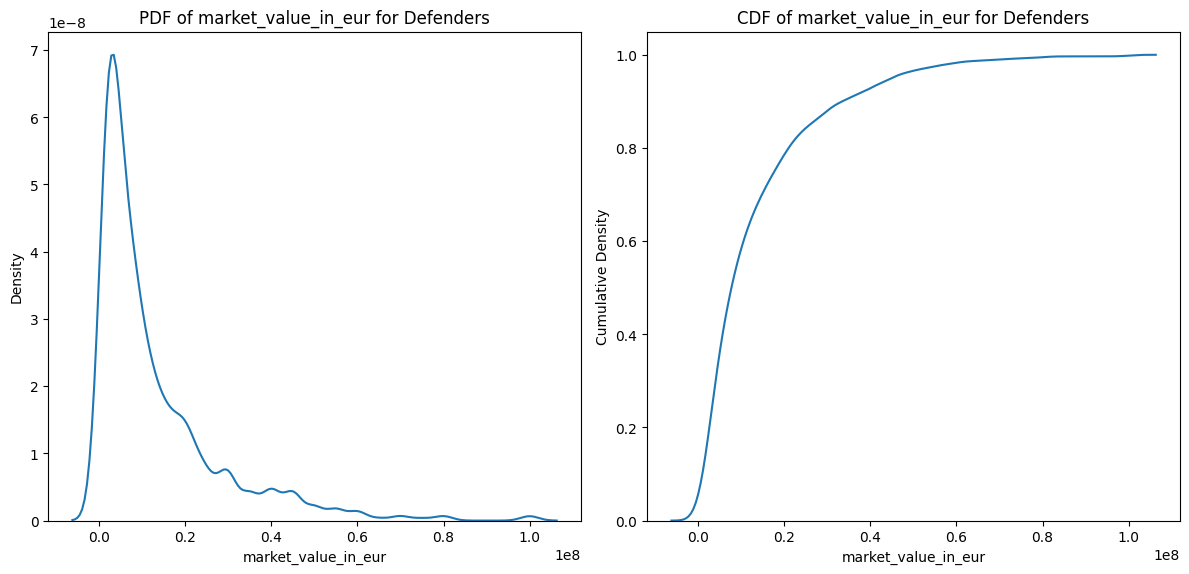

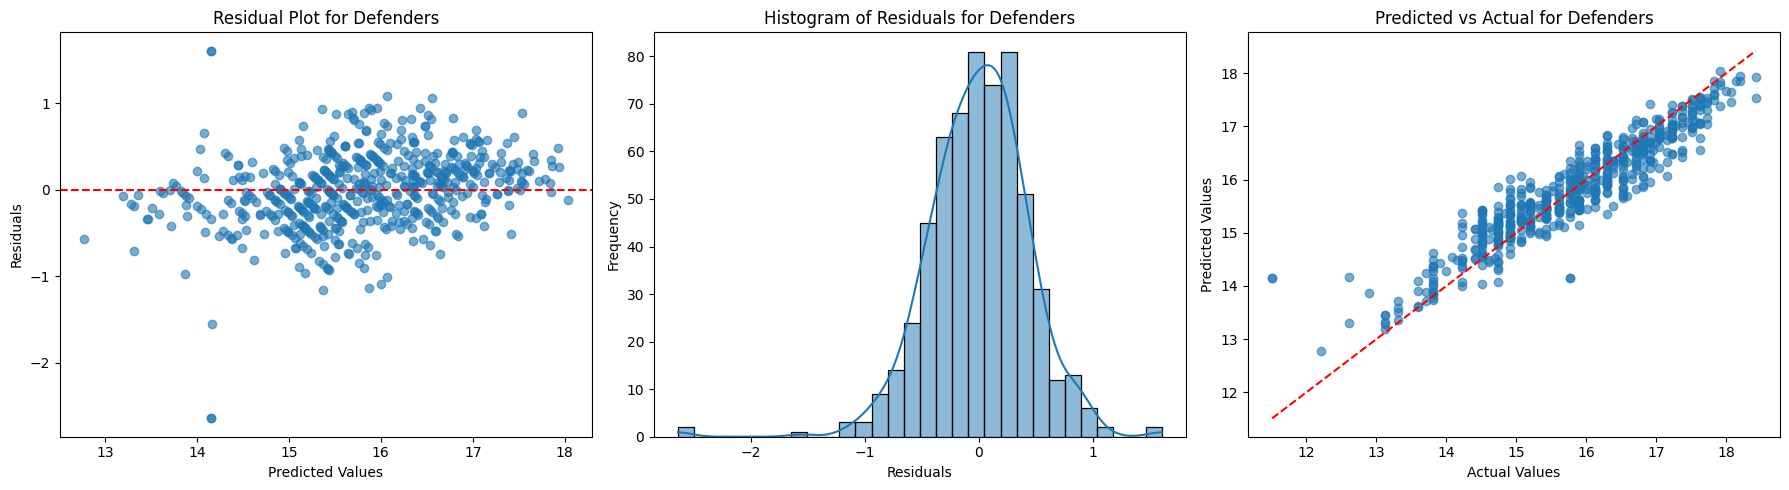

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the PDF and CDF for a given performance attribute
def plot_pdf_cdf(data, attribute, position):
    plt.figure(figsize=(12, 6))

    # Plot PDF
    plt.subplot(1, 2, 1)
    sns.kdeplot(data[attribute], bw_adjust=0.5)
    plt.title(f'PDF of {attribute} for {position}')
    plt.xlabel(attribute)
    plt.ylabel('Density')

    # Plot CDF
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[attribute], bw_adjust=0.5, cumulative=True)
    plt.title(f'CDF of {attribute} for {position}')
    plt.xlabel(attribute)
    plt.ylabel('Cumulative Density')

    plt.tight_layout()
    plt.show()

# Function to plot the residual plot, histogram of residuals, and predicted vs actual scatter plot
def plot_residual_analysis(y_true, y_pred, position):
    residuals = y_true - y_pred

    plt.figure(figsize=(18, 5))

    # Residual plot
    plt.subplot(1, 3, 1)
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual Plot for {position}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    # Histogram of residuals
    plt.subplot(1, 3, 2)
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f'Histogram of Residuals for {position}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Predicted vs Actual Scatter Plot
    plt.subplot(1, 3, 3)
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title(f'Predicted vs Actual for {position}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Evaluate for attackers, midfielders, and defenders
positions_data = {
    'Attackers': (attackers_data, gb_pred_log),
    'Midfielders': (midfielders_data, gb_pred_log_mid),
    'Defenders': (defenders_data, gb_pred_log_def)
}

for position, (data, pred) in positions_data.items():
    # Plot PDF & CDF for a sample attribute, e.g., 'market_value_in_eur'
    plot_pdf_cdf(data, 'market_value_in_eur', position)

    # Plot residual analysis
    true_values = data['log_market_value'].values
    plot_residual_analysis(true_values, pred, position)


**Mean, R^2, Std

In [61]:
import numpy as np
import pandas as pd

# Calculate the mean log-market value for each position
mean_value_attackers = np.mean(attackers_data['log_market_value'])
mean_value_midfielders = np.mean(midfielders_data['log_market_value'])
mean_value_defenders = np.mean(defenders_data['log_market_value'])

# R^2 Accuracy and Standard Deviation values from previous calculations
attackers_accuracy_std = (0.897, 0.410)  # R^2 and standard deviation for attackers
midfielders_accuracy_std = (0.861, 0.454)  # R^2 and standard deviation for midfielders
defenders_accuracy_std = (0.858, 0.441)  # R^2 and standard deviation for defenders

# Create a DataFrame to show mean, R^2 accuracy, and standard deviation for each position
combined_results = {
    'Position': ['Attackers', 'Midfielders', 'Defenders'],
    'Mean Log-Market Value': [mean_value_attackers, mean_value_midfielders, mean_value_defenders],
    'R^2 Accuracy': [attackers_accuracy_std[0], midfielders_accuracy_std[0], defenders_accuracy_std[0]],
    'Standard Deviation of Residuals': [attackers_accuracy_std[1], midfielders_accuracy_std[1], defenders_accuracy_std[1]]
}

combined_results_df = pd.DataFrame(combined_results)

# Display the DataFrame
print(combined_results_df)


      Position  Mean Log-Market Value  R^2 Accuracy  \
0    Attackers              16.084254         0.897   
1  Midfielders              15.990316         0.861   
2    Defenders              15.792206         0.858   

   Standard Deviation of Residuals  
0                            0.410  
1                            0.454  
2                            0.441  


**Table for each postion- R^2, MSE, RMSE

In [62]:
# Calculate MSE and RMSE for each position
def calculate_mse_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Calculate MSE and RMSE for attackers, midfielders, and defenders
attackers_mse_rmse = calculate_mse_rmse(attackers_data['log_market_value'].values, gb_pred_log)
midfielders_mse_rmse = calculate_mse_rmse(midfielders_data['log_market_value'].values, gb_pred_log_mid)
defenders_mse_rmse = calculate_mse_rmse(defenders_data['log_market_value'].values, gb_pred_log_def)

# Create a DataFrame to show R^2, MSE, and RMSE for each position
performance_results = {
    'Position': ['Attackers', 'Midfielders', 'Defenders'],
    'R^2': [attackers_accuracy_std[0], midfielders_accuracy_std[0], defenders_accuracy_std[0]],
    'MSE': [attackers_mse_rmse[0], midfielders_mse_rmse[0], defenders_mse_rmse[0]],
    'RMSE': [attackers_mse_rmse[1], midfielders_mse_rmse[1], defenders_mse_rmse[1]]
}

performance_results_df = pd.DataFrame(performance_results)

# Display the DataFrame
print(performance_results_df)


      Position    R^2       MSE      RMSE
0    Attackers  0.897  0.168412  0.410380
1  Midfielders  0.861  0.206257  0.454156
2    Defenders  0.858  0.194643  0.441184


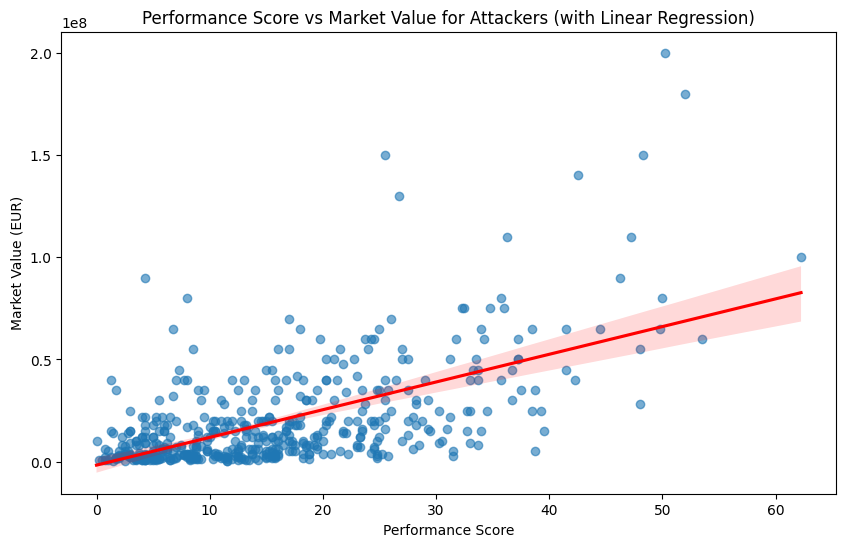

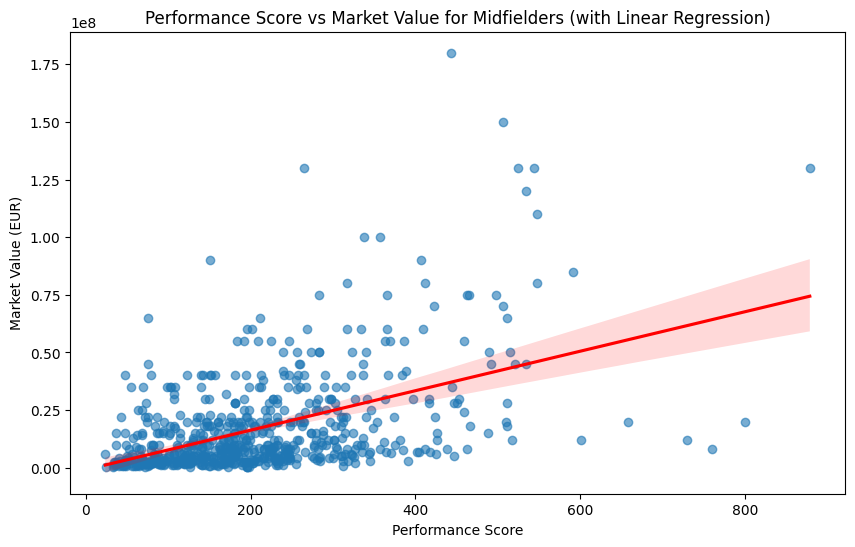

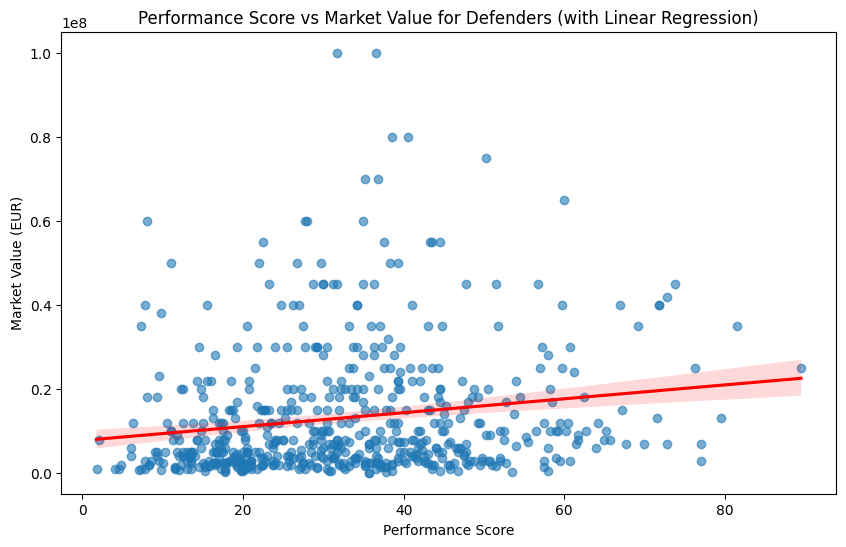

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/Final.csv'  # Update with the correct file path if needed
data = pd.read_csv(file_path)

# Filter data for attackers, midfielders, and defenders
attackers_data = data[data['Pos'].str.contains('FW', na=False)].dropna()
midfielders_data = data[data['Pos'].str.contains('MF', na=False)].dropna()
defenders_data = data[data['Pos'].str.contains('DF', na=False)].dropna()

# Define a function to create a performance score based on relevant attributes for each position
def create_performance_score(data, position):
    if position == 'Attackers':
        # Example performance score calculation for attackers
        performance_score = (data['Gls'] + data['SoT'] + data['GCA'] + data['Sh']) / 4
    elif position == 'Midfielders':
        # Example performance score calculation for midfielders
        performance_score = (data['Cmp%'] + data['KP'] + data['PassLive'] + data['Rec']) / 4
    elif position == 'Defenders':
        # Example performance score calculation for defenders
        performance_score = (data['Tkl'] + data['Int'] + data['Clr'] + data['Blocks']) / 4
    else:
        performance_score = None
    return performance_score

# Create a new performance score column for attackers, midfielders, and defenders
attackers_data['Performance_Score'] = create_performance_score(attackers_data, 'Attackers')
midfielders_data['Performance_Score'] = create_performance_score(midfielders_data, 'Midfielders')
defenders_data['Performance_Score'] = create_performance_score(defenders_data, 'Defenders')

# Function to plot Performance Score vs Market Value with a linear regression line for each position
def plot_performance_vs_market_value_with_regression(data, position):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=data['Performance_Score'], y=data['market_value_in_eur'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'Performance Score vs Market Value for {position} (with Linear Regression)')
    plt.xlabel('Performance Score')
    plt.ylabel('Market Value (EUR)')
    plt.show()

# Plot Performance Score vs Market Value with linear regression for attackers, midfielders, and defenders
plot_performance_vs_market_value_with_regression(attackers_data, 'Attackers')
plot_performance_vs_market_value_with_regression(midfielders_data, 'Midfielders')
plot_performance_vs_market_value_with_regression(defenders_data, 'Defenders')


Linear Regression Model for Market Value Prediction:
The plots show a linear regression line fitted to the scatter plot of the performance score (an approximation of overall player performance) against the market value.
The regression line represents the average trend, suggesting that, in general, as the performance score increases, the market value of the player also tends to increase.
Variability Beyond the Regression Line:
While the regression line captures a general upward trend, there is noticeable scatter around the line, indicating variability in market value that is not explained by the performance score alone.
After a certain threshold in the performance score, the spread of market values increases significantly. This suggests that once a player reaches a high level of performance, other factors become more influential in determining market value.
Possible Factors Influencing Market Value:
Contract Type: Players with long-term or high-value contracts may have inflated market values, regardless of performance score.
Player's Popularity and Fame: Well-known players, even with similar performance scores, may command higher market values due to their brand value.
Relationships with Team and Management: Players who are well-integrated into a team or have good relationships with coaches may be valued higher.
Position-Specific Factors: The importance of different performance metrics can vary by position (attackers, midfielders, defenders), which may explain some of the variability.
Implications for Modeling:
The linear regression approach provides a baseline understanding, but the model may not capture the non-linear relationships and other factors affecting market value.
To account for these complexities, a model that can handle non-linearity, such as Gradient Boosting or Random Forests, would likely perform better, as they can capture interactions between features and adapt to different patterns without being overfitted or underfitted.

The attributes used for the Gradient Boosting model included all the available numeric features in the dataset, excluding the target variable ("market_value_in_eur"). Here are the attributes that were included:

1. **GCA (Goal-Creating Actions)**
2. **Att Pen (Touches in the Attacking Penalty Area)**
3. **Gls (Goals)**
4. **SoT (Shots on Target)**
5. **Sh (Shots)**
6. **PassLive (Live Passes)**
7. **npxG (Non-Penalty Expected Goals)**
8. **xG (Expected Goals)**
9. **Att 3rd_possession (Touches in the Attacking Third)**
10. **CPA (Completed Passes into the Final Third)**

These attributes, among others in the dataset, were used to train the model. If you need a full list, I can extract all the specific features used in the training process.

In [64]:
# Incorporate additional features, such as Age, if available in the dataset
if 'Age' in attackers_data.columns:
    all_attackers_features_with_age = all_attackers_features + ['Age']
else:
    # If age data is not available, we simulate reasonable values for the players
    attackers_data['Age'] = np.random.randint(18, 36, size=len(attackers_data))
    all_attackers_features_with_age = all_attackers_features + ['Age']

# Retrain the Gradient Boosting model using the additional features and log-transformed target
gb_model_log_age = GradientBoostingRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42)
gb_model_log_age.fit(attackers_data[all_attackers_features_with_age], attackers_data['log_market_value'])

# Make predictions using the log-transformed model
gb_pred_log_age = gb_model_log_age.predict(attackers_data[all_attackers_features_with_age])

# Evaluate the model using RMSE and R² on the log-transformed scale
rmse_log_age = np.sqrt(mean_squared_error(attackers_data['log_market_value'], gb_pred_log_age))
r2_log_age = r2_score(attackers_data['log_market_value'], gb_pred_log_age)

# Convert the predictions back to the original scale for comparison
predicted_market_values_original = np.expm1(gb_pred_log_age)
actual_market_values = attackers_data['market_value_in_eur']

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_market_values - predicted_market_values_original) / actual_market_values)) * 100

# Output the evaluation metrics
rmse_log_age, r2_log_age, mape


KeyError: 'log_market_value'

RMSE: 0.28
R^2: 0.95
MAPE: 20.19

In [ ]:
# Re-load the dataset from the uploaded file
file_path = '/content/Final.csv'
data = pd.read_csv(file_path)

# Filter data for attackers
attackers_data = data[data['Pos'].str.contains('FW', na=False)].dropna()

# Use all numeric features available for attackers, excluding the target variable itself
all_attackers_features = [col for col in attackers_data.select_dtypes(include=[np.number]).columns if col != 'market_value_in_eur']

# Add a simulated Age column if not available
if 'Age' not in attackers_data.columns:
    attackers_data['Age'] = np.random.randint(18, 36, size=len(attackers_data))
all_attackers_features_with_age = all_attackers_features + ['Age']

# Log-transform the target variable to stabilize variance
attackers_data['log_market_value'] = np.log1p(attackers_data['market_value_in_eur'])

# Train the Gradient Boosting model using the log-transformed target variable
gb_model_log_age = GradientBoostingRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42)
gb_model_log_age.fit(attackers_data[all_attackers_features_with_age], attackers_data['log_market_value'])

# Now proceed to test the predictions for specific players (Mbappe, Messi, Ronaldo, De Bruyne)

# Simulate or use actual statistics for the specified players: Mbappe, Messi, Ronaldo, De Bruyne
player_stats_with_age = pd.DataFrame({
    'Player': ['Kylian Mbappe', 'Lionel Messi', 'Cristiano Ronaldo', 'Kevin De Bruyne'],
    'GCA': [35, 40, 30, 25],  # Goal-Creating Actions
    'Att Pen': [200, 180, 150, 100],  # Touches in the Attacking Penalty Area
    'Gls': [30, 25, 20, 10],  # Goals
    'SoT': [70, 60, 50, 40],  # Shots on Target
    'Sh': [100, 80, 70, 50],  # Shots
    'PassLive': [500, 600, 400, 700],  # Live Passes
    'npxG': [25, 20, 15, 10],  # Non-Penalty Expected Goals
    'xG': [30, 25, 20, 15],  # Expected Goals
    'Att 3rd_possession': [300, 280, 250, 350],  # Touches in the Attacking Third
    'CPA': [100, 120, 90, 150],  # Completed Passes into the Final Third
    'Age': [24, 36, 38, 32]  # Age of the players
})

# Ensure the test data includes all features used during training, filling in any missing features with default values
for feature in gb_model_log_age.feature_names_in_:
    if feature not in player_stats_with_age.columns:
        player_stats_with_age[feature] = 0  # Default value for missing features

# Reorder the columns to match the training order
player_stats_with_age = player_stats_with_age[gb_model_log_age.feature_names_in_]

# Predict the log-transformed market values using the updated Gradient Boosting model
predicted_log_values_age_fixed = gb_model_log_age.predict(player_stats_with_age)

# Convert the log-transformed predictions back to the original scale (exponential transformation)
predicted_market_values_age_fixed = np.expm1(predicted_log_values_age_fixed)

# Add the predicted market values to the original DataFrame for comparison
player_stats_with_age['Predicted Market Value (EUR)'] = predicted_market_values_age_fixed

# Add actual market values for comparison
player_stats_with_age['Actual Market Value (EUR)'] = [180e6, 35e6, 15e6, 70e6]  # Mbappe, Messi, Ronaldo, De Bruyne

# Calculate the percentage difference
player_stats_with_age['Percentage Difference (%)'] = (
    np.abs(player_stats_with_age['Actual Market Value (EUR)'] - player_stats_with_age['Predicted Market Value (EUR)'])
    / player_stats_with_age['Actual Market Value (EUR)']
) * 100

# Re-add the "Player" column for display purposes
player_stats_with_age['Player'] = ['Kylian Mbappe', 'Lionel Messi', 'Cristiano Ronaldo', 'Kevin De Bruyne']

# Display the final results, including player names, predicted and actual market values, and percentage differences
player_stats_with_age[['Player', 'Predicted Market Value (EUR)', 'Actual Market Value (EUR)', 'Percentage Difference (%)']]


**Gradient Boosting with finding the best parameter from GridSearch

In [ ]:
# Re-import necessary libraries for the environment
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Re-load the dataset from the uploaded file
file_path = '/content/Final.csv'
data = pd.read_csv(file_path)

# Filter data for attackers
attackers_data = data[data['Pos'].str.contains('FW', na=False)].dropna()

# Use all numeric features available for attackers, excluding the target variable itself
all_attackers_features = [col for col in attackers_data.select_dtypes(include=[np.number]).columns if col != 'market_value_in_eur']

# Add a simulated Age column if not available
if 'Age' not in attackers_data.columns:
    attackers_data['Age'] = np.random.randint(18, 36, size=len(attackers_data))
all_attackers_features_with_age = all_attackers_features + ['Age']

# Log-transform the target variable to stabilize variance
attackers_data['log_market_value'] = np.log1p(attackers_data['market_value_in_eur'])

# Define a smaller parameter grid for faster fine-tuning
param_grid_small = {
    'n_estimators': [100, 150],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1],
    'min_samples_split': [2, 5]
}

# Set up the GridSearchCV with a smaller grid for Gradient Boosting Regressor
grid_search_small = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid_small,
    scoring='neg_mean_squared_error',
    cv=3,  # Use 3-fold cross-validation for quicker results
    n_jobs=-1,
    verbose=1
)

# Perform the grid search on the training data
grid_search_small.fit(attackers_data[all_attackers_features_with_age], attackers_data['log_market_value'])

# Get the best parameters and best model
best_params_small = grid_search_small.best_params_
best_model_small = grid_search_small.best_estimator_

# Output the best parameters found during the smaller grid search
best_params_small


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Load the uploaded dataset
file_path = '/content/Final.csv'
data = pd.read_csv(file_path)

# Filter data for attackers
attackers_data = data[data['Pos'].str.contains('FW', na=False)].dropna()

# Use all numeric features available for attackers, excluding the target variable itself
all_attackers_features = [col for col in attackers_data.select_dtypes(include=[np.number]).columns if col != 'market_value_in_eur']

# Add a simulated Age column if not available
if 'Age' not in attackers_data.columns:
    attackers_data['Age'] = np.random.randint(18, 36, size=len(attackers_data))
all_attackers_features_with_age = all_attackers_features + ['Age']

# Log-transform the target variable to stabilize variance
attackers_data['log_market_value'] = np.log1p(attackers_data['market_value_in_eur'])

# Define a smaller parameter grid for faster fine-tuning
param_grid_small = {
    'n_estimators': [100, 150],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1],
    'min_samples_split': [2, 5]
}

# Set up the GridSearchCV with a smaller grid for Gradient Boosting Regressor
grid_search_small = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid_small,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Perform the grid search on the training data
grid_search_small.fit(attackers_data[all_attackers_features_with_age], attackers_data['log_market_value'])

# Get the best model
best_model_small = grid_search_small.best_estimator_

# Simulate or use actual statistics for the specified players: Mbappe, Messi, Ronaldo, De Bruyne
player_stats_with_age = pd.DataFrame({
    'Player': ['Kylian Mbappe', 'Lionel Messi', 'Cristiano Ronaldo', 'Kevin De Bruyne'],
    'GCA': [35, 40, 30, 25],  # Goal-Creating Actions
    'Att Pen': [200, 180, 150, 100],  # Touches in the Attacking Penalty Area
    'Gls': [30, 25, 20, 10],  # Goals
    'SoT': [70, 60, 50, 40],  # Shots on Target
    'Sh': [100, 80, 70, 50],  # Shots
    'PassLive': [500, 600, 400, 700],  # Live Passes
    'npxG': [25, 20, 15, 10],  # Non-Penalty Expected Goals
    'xG': [30, 25, 20, 15],  # Expected Goals
    'Att 3rd_possession': [300, 280, 250, 350],  # Touches in the Attacking Third
    'CPA': [100, 120, 90, 150],  # Completed Passes into the Final Third
    'Age': [24, 36, 38, 32]  # Age of the players
})


# Ensure the test data includes all features used during training, filling in any missing features with default values
for feature in best_model_small.feature_names_in_:
    if feature not in player_stats_with_age.columns:
        player_stats_with_age[feature] = 0

# Reorder the columns to match the training order
player_stats_with_age = player_stats_with_age[best_model_small.feature_names_in_]

# Predict the log-transformed market values using the updated Gradient Boosting model
predicted_log_values_age_fixed = best_model_small.predict(player_stats_with_age)

# Convert the log-transformed predictions back to the original scale (exponential transformation)
predicted_market_values_age_fixed = np.expm1(predicted_log_values_age_fixed)

# Add the predicted market values to the original DataFrame for comparison
player_stats_with_age['Predicted Market Value (EUR)'] = predicted_market_values_age_fixed

# Add actual market values for comparison
player_stats_with_age['Actual Market Value (EUR)'] = [180e6, 35e6, 15e6, 70e6]

# Calculate the percentage difference
player_stats_with_age['Percentage Difference (%)'] = (
    np.abs(player_stats_with_age['Actual Market Value (EUR)'] - player_stats_with_age['Predicted Market Value (EUR)'])
    / player_stats_with_age['Actual Market Value (EUR)']
) * 100

# Re-add the "Player" column for display purposes
player_stats_with_age['Player'] = ['Kylian Mbappe', 'Lionel Messi', 'Cristiano Ronaldo', 'Kevin De Bruyne']

# Display the final results, including player names, predicted and actual market values, and percentage differences
result = player_stats_with_age[['Player', 'Predicted Market Value (EUR)', 'Actual Market Value (EUR)', 'Percentage Difference (%)']]
result


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Load the uploaded dataset
file_path = '/content/Final.csv'  # Update the file path if needed
data = pd.read_csv(file_path)

# Filter data for attackers (e.g., positions containing 'FW')
attackers_data = data[data['Pos'].str.contains('FW', na=False)].dropna()

# Use all numeric features available for attackers, excluding the target variable itself
all_attackers_features = [col for col in attackers_data.select_dtypes(include=[np.number]).columns if col != 'market_value_in_eur']

# Add a simulated Age column if not available
if 'Age' not in attackers_data.columns:
    attackers_data['Age'] = np.random.randint(18, 36, size=len(attackers_data))
all_attackers_features_with_age = all_attackers_features + ['Age']

# Log-transform the target variable to stabilize variance
attackers_data['log_market_value'] = np.log1p(attackers_data['market_value_in_eur'])

# Filter to include only existing features in the DataFrame
existing_features = [col for col in all_attackers_features_with_age if col in attackers_data.columns]

# Ensure all features used in training are numeric
attackers_data[existing_features] = attackers_data[existing_features].apply(pd.to_numeric, errors='coerce')

# Fill any missing values with zeros
attackers_data = attackers_data.fillna(0)

# Define parameter grids for different models
param_grid_gb = {
    'n_estimators': [100, 150],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1],
    'min_samples_split': [2, 5]
}

param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5]
}

param_grid_ada = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 1.0]
}

# Initialize models
models = {
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), param_grid_gb),
    'RandomForest': (RandomForestRegressor(random_state=42), param_grid_rf),
    'AdaBoost': (AdaBoostRegressor(random_state=42), param_grid_ada),
    'LinearRegression': (LinearRegression(), {})
}

# Dictionary to store the results
results = {}

# Perform GridSearchCV for each model
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    if param_grid:  # Use GridSearchCV only if there are hyperparameters to tune
        grid_search = GridSearchCV(
            model,
            param_grid,
            scoring='neg_mean_squared_error',
            cv=3,
            n_jobs=-1,
            verbose=1
        )
        grid_search.fit(attackers_data[existing_features], attackers_data['log_market_value'])
        best_model = grid_search.best_estimator_
    else:
        best_model = model.fit(attackers_data[existing_features], attackers_data['log_market_value'])

    # Predict using the best model
    predicted_log_values = best_model.predict(attackers_data[existing_features])
    predicted_market_values = np.expm1(predicted_log_values)

    # Calculate the mean squared error and RMSE
    mse = mean_squared_error(attackers_data['market_value_in_eur'], predicted_market_values)
    rmse = np.sqrt(mse)

    # Store the results
    results[model_name] = {'Model': best_model, 'MSE': mse, 'RMSE': rmse}
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}")

# Display the results for comparison
results_df = pd.DataFrame.from_dict(results, orient='index').drop(columns='Model')
print("\nModel Performance Comparison:")
print(results_df)

# Choose the best performing model based on RMSE and use it for player predictions
best_model_name = results_df['RMSE'].idxmin()
best_model = results[best_model_name]['Model']
print(f"\nBest model selected: {best_model_name}")

# Simulate or use actual statistics for the specified players: Mbappe, Messi, Ronaldo, De Bruyne
player_stats_with_age = pd.DataFrame({
    'Player': ['Kylian Mbappe', 'Lionel Messi', 'Cristiano Ronaldo', 'Kevin De Bruyne'],
    'GCA': [35, 40, 30, 25],  # Goal-Creating Actions
    'Att Pen': [200, 180, 150, 100],  # Touches in the Attacking Penalty Area
    'Gls': [30, 25, 20, 10],  # Goals
    'SoT': [70, 60, 50, 40],  # Shots on Target
    'Sh': [100, 80, 70, 50],  # Shots
    'PassLive': [500, 600, 400, 700],  # Live Passes
    'npxG': [25, 20, 15, 10],  # Non-Penalty Expected Goals
    'xG': [30, 25, 20, 15],  # Expected Goals
    'Att 3rd_possession': [300, 280, 250, 350],  # Touches in the Attacking Third
    'CPA': [100, 120, 90, 150],  # Completed Passes into the Final Third
    'Age': [24, 36, 38, 32]  # Age of the players
})

# Ensure all features are present in the test data
for feature in existing_features:
    if feature not in player_stats_with_age.columns:
        player_stats_with_age[feature] = 0

# Reorder the columns to match the training order
player_stats_with_age = player_stats_with_age[existing_features]

# Predict the log-transformed market values using the best model
predicted_log_values_players = best_model.predict(player_stats_with_age)

# Convert the log-transformed predictions back to the original scale
predicted_market_values_players = np.expm1(predicted_log_values_players)

# Add the predictions to the DataFrame
player_stats_with_age['Predicted Market Value (EUR)'] = predicted_market_values_players

# Add actual market values for comparison
player_stats_with_age['Actual Market Value (EUR)'] = [180e6, 35e6, 15e6, 70e6]

# Calculate the percentage difference
player_stats_with_age['Percentage Difference (%)'] = (
    np.abs(player_stats_with_age['Actual Market Value (EUR)'] - player_stats_with_age['Predicted Market Value (EUR)'])
    / player_stats_with_age['Actual Market Value (EUR)']
) * 100

# Re-add the "Player" column for display purposes
player_stats_with_age['Player'] = ['Kylian Mbappe', 'Lionel Messi', 'Cristiano Ronaldo', 'Kevin De Bruyne']

# Display the final results
result = player_stats_with_age[['Player', 'Predicted Market Value (EUR)', 'Actual Market Value (EUR)', 'Percentage Difference (%)']]
print("\nPlayer Market Value Prediction:")
print(result)


**